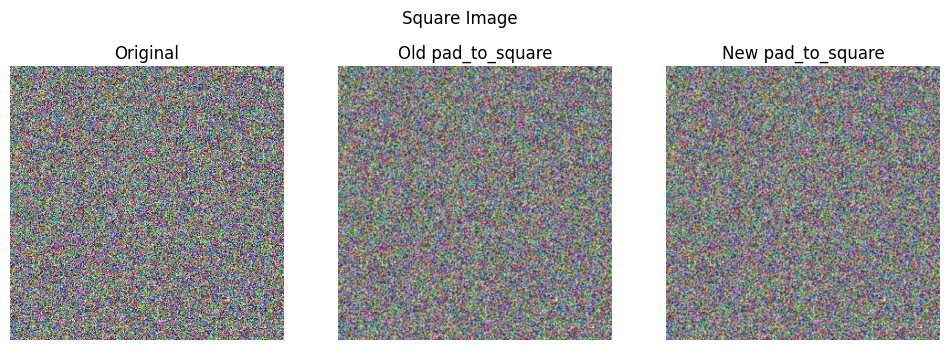

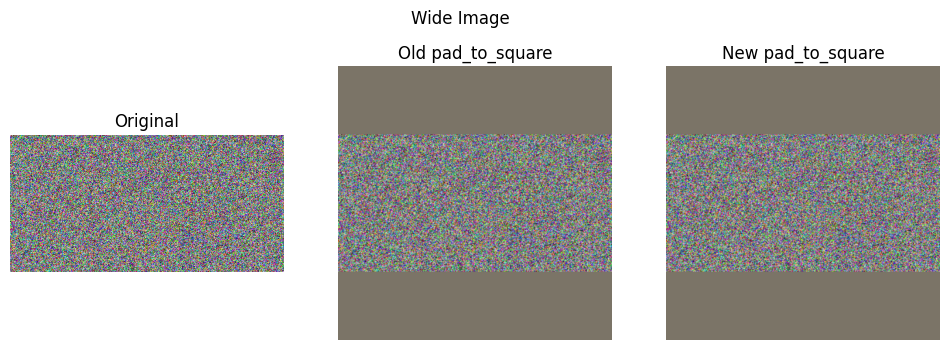

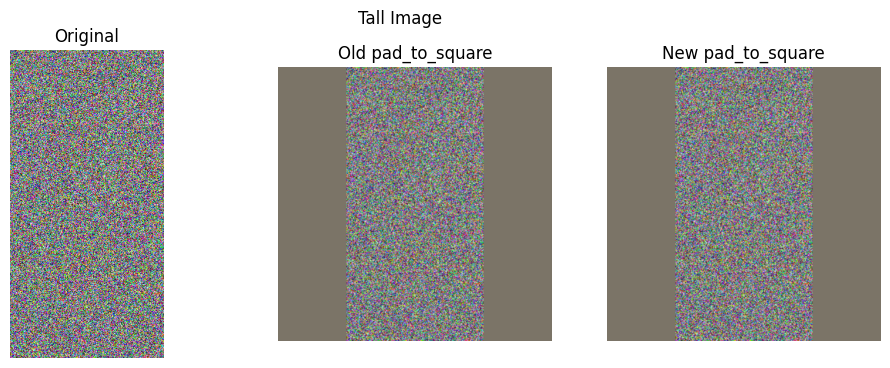

In [2]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def old_pad_to_square(image, resize_target=(480, 480)):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    padding_value = np.array([103.53, 116.28, 123.675], dtype=np.uint8).tolist()    # bgr
    h, w, _ = image.shape
    if h > w:
        pad_h = 0
        pad_w = (h - w) // 2
    else:
        pad_w = 0
        pad_h = (w - h) // 2
    padded_image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_CONSTANT, value=padding_value)
    resized_image = cv2.resize(padded_image, resize_target, interpolation=cv2.INTER_LINEAR)
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)  # Convert back to RGB
    return resized_image

def new_pad_to_square(image: Image.Image, resize_target=(480, 480), padding_fill_value=(123, 116, 103)) -> Image.Image:
    w, h = image.size
    max_wh = max(w, h)
    horizontal_pad = (max_wh - w) // 2
    vertical_pad = (max_wh - h) // 2
    padding = (horizontal_pad, vertical_pad, max_wh - w - horizontal_pad, max_wh - h - vertical_pad)
    # PIL.ImageOps.expand is a simple alternative to torchvision.transforms.functional.pad
    from PIL import ImageOps
    padded_image = ImageOps.expand(image, border=padding, fill=padding_fill_value)
    resized_image = padded_image.resize(resize_target, Image.BILINEAR)
    return resized_image

def show_compare(img_np, old_result, new_result, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img_np)
    plt.title('Original')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(old_result)
    plt.title('Old pad_to_square')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(new_result)
    plt.title('New pad_to_square')
    plt.axis('off')
    plt.suptitle(title)
    plt.show()

def test_pad_to_square():
    # Example 1: RGB square image
    img1 = np.random.randint(0, 255, (300, 300, 3), dtype=np.uint8)
    pil_img1 = Image.fromarray(img1)
    old1 = old_pad_to_square(img1)
    new1 = np.array(new_pad_to_square(pil_img1))
    show_compare(img1, old1, new1, "Square Image")

    # Example 2: Wide image
    img2 = np.random.randint(0, 255, (200, 400, 3), dtype=np.uint8)
    pil_img2 = Image.fromarray(img2)
    old2 = old_pad_to_square(img2)
    new2 = np.array(new_pad_to_square(pil_img2))
    show_compare(img2, old2, new2, "Wide Image")

    # Example 3: Tall image
    img3 = np.random.randint(0, 255, (400, 200, 3), dtype=np.uint8)
    pil_img3 = Image.fromarray(img3)
    old3 = old_pad_to_square(img3)
    new3 = np.array(new_pad_to_square(pil_img3))
    show_compare(img3, old3, new3, "Tall Image")

    # Example 4: Real image file (optional, if you have test.jpg)
    # img4 = cv2.imread('test.jpg')
    # img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    # pil_img4 = Image.fromarray(img4)
    # old4 = old_pad_to_square(img4)
    # new4 = np.array(new_pad_to_square(pil_img4))
    # show_compare(img4, old4, new4, "Real Image")

test_pad_to_square()